# 와인 측정치를 통해 베스트모델 만들기 

## 1. 데이터의 확인 및 실행 

In [6]:
import pandas as pd
df_pre = pd.read_csv("/content/sample_data/wine.csv", header = None)
df = df_pre.sample(frac = 1) # 원본 데이터의 100퍼센트를 불러오라는 의미, 0.5는 50%만 랜덤으로 불러옴.

In [8]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12
468,11.4,0.36,0.69,2.1,0.090,6.0,21.0,1.00000,3.17,0.62,9.2,6,1
2604,6.6,0.18,0.28,3.3,0.044,18.0,91.0,0.99300,3.42,0.64,10.8,6,0
1496,7.7,0.54,0.26,1.9,0.089,23.0,147.0,0.99636,3.26,0.59,9.7,5,1
2479,7.1,0.21,0.32,2.2,0.037,28.0,141.0,0.99300,3.20,0.57,10.0,7,0
6482,4.9,0.47,0.17,1.9,0.035,60.0,148.0,0.98964,3.27,0.35,11.5,6,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 468 to 6109
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6497 non-null   float64
 1   1       6497 non-null   float64
 2   2       6497 non-null   float64
 3   3       6497 non-null   float64
 4   4       6497 non-null   float64
 5   5       6497 non-null   float64
 6   6       6497 non-null   float64
 7   7       6497 non-null   float64
 8   8       6497 non-null   float64
 9   9       6497 non-null   float64
 10  10      6497 non-null   float64
 11  11      6497 non-null   int64  
 12  12      6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


## 2. 변수 설명 

1) Alcohol - 주석산 농도

2 Malic acid - 아세트산 농도

3) Ash - 구연산 농도

4) Alcalinity of ash - 잔류 당분 농도

5) Magnesium - 염화나트륨 농도

6) Total phenols - 유리 아황산 농도

7) Flavanoids - 총 아황산 농도

8) Nonflavanoid phenols - 밀도

9) Proanthocyanins - ph

10)Color intensity - 황산칼륨농도

11)Hue - 알코올 도수

12)OD280/OD315 of diluted wines - 와인의 맛(0 ~ 10등급)

13)Proline - (1: 레드와인, 0 : 화이트 와인)

## 2.1 와인 데이터 확인 및 예측 수행

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 조기중단
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt 

In [12]:
#seed값 설정
seed = 156
np.random.seed(seed)
tf.random.set_seed(seed)

In [14]:
# 데이터 입력
dataset = df.values
X = dataset[:, 0:12]
Y = dataset[:, 12]  # label data

In [15]:
# 모델 설정
model = Sequential()
model.add(Dense(30, activation='relu', input_dim = 12))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [18]:
# 모델 컴파일
model.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics=['accuracy'])

In [19]:
# 모델 수행
model.fit(X, Y, epochs=200, batch_size=200)

Epoch 1/200
33/33 [==============================] - 2s 3ms/step - loss: 0.4650 - accuracy: 0.8611
Epoch 2/200
33/33 [==============================] - 0s 3ms/step - loss: 0.2350 - accuracy: 0.9253
Epoch 3/200
33/33 [==============================] - 0s 3ms/step - loss: 0.2299 - accuracy: 0.9219
Epoch 4/200
33/33 [==============================] - 0s 3ms/step - loss: 0.2024 - accuracy: 0.9316
Epoch 5/200
33/33 [==============================] - 0s 3ms/step - loss: 0.1874 - accuracy: 0.9379
Epoch 6/200
33/33 [==============================] - 0s 3ms/step - loss: 0.1847 - accuracy: 0.9369
Epoch 7/200
33/33 [==============================] - 0s 3ms/step - loss: 0.1720 - accuracy: 0.9405
Epoch 8/200
33/33 [==============================] - 0s 3ms/step - loss: 0.1609 - accuracy: 0.9440
Epoch 9/200
33/33 [==============================] - 0s 3ms/step - loss: 0.1608 - accuracy: 0.9433
Epoch 10/200
33/33 [==============================] - 0s 3ms/step - loss: 0.1478 - accuracy: 0.9463
Epoch 11/

In [20]:
# 결과 및 정확도 출력
print("\n Accuracy : %.4f" % (model.evaluate(X, Y)[1]))

204/204 [==============================] - 1s 2ms/step - loss: 0.0429 - accuracy: 0.9877

 Accuracy : 0.9877


* 정확도가 98.8퍼센트의 딥러닝 프레임워크 완

In [ ]:
 정확도가 98.8퍼센트의 딥러닝 프레임워크 완성

## 3. 모델 업데이트 
* epoch마다 모델의 정확도를 기록하고 저장 

In [21]:
import os

MODEL_DIR = "/content/sample_data/model/"
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

# 모델 이름 
modelpath = MODEL_DIR+"{epoch:02d}-{val_loss:.4f}.hdf5"

In [26]:
# ModelCheckPoint클래스를 이용해 모니터할 지정값 설정
from tensorflow.keras.callbacks import ModelCheckpoint

# verbose = 1(기록 저장), 0(저장안함)
# save_best_only = True는 모델이 앞서 저장한 모델보다 나아졌을때만 저장하게끔 하는 옵션(기본값 : False)
checkpoint = ModelCheckpoint(filepath=modelpath,monitor = 'val_loss', verbose=1, save_best_only= True)

In [27]:
# 학습수행
# validation_split = 0.2의 의미는 20퍼센트를 테스트용으로 사용
model.fit(X, Y, validation_split= 0.2,  epochs= 200, batch_size=200, verbose=0, callbacks=[checkpoint])


Epoch 00001: val_loss improved from inf to 0.06729, saving model to /content/sample_data/model/01-0.0673.hdf5

Epoch 00002: val_loss improved from 0.06729 to 0.06646, saving model to /content/sample_data/model/02-0.0665.hdf5

Epoch 00003: val_loss did not improve from 0.06646

Epoch 00004: val_loss improved from 0.06646 to 0.06513, saving model to /content/sample_data/model/04-0.0651.hdf5

Epoch 00005: val_loss did not improve from 0.06513

Epoch 00006: val_loss did not improve from 0.06513

Epoch 00007: val_loss did not improve from 0.06513

Epoch 00008: val_loss did not improve from 0.06513

Epoch 00009: val_loss did not improve from 0.06513

Epoch 00010: val_loss did not improve from 0.06513

Epoch 00011: val_loss did not improve from 0.06513

Epoch 00012: val_loss did not improve from 0.06513

Epoch 00013: val_loss did not improve from 0.06513

Epoch 00014: val_loss did not improve from 0.06513

Epoch 00015: val_loss did not improve from 0.06513

Epoch 00016: val_loss did not impr

## 4. 와인종류 예측 - 모델 업데이트 

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint

import pandas as pd
import numpy as np 
import os
import tensorflow as tf 

In [30]:
#seed값 설정
seed = 11
np.random.seed(seed)
tf.random.set_seed(seed)

In [31]:
df_pre = pd.read_csv("/content/sample_data/wine.csv", header = None)
df = df_pre.sample(frac = 1)

In [33]:
# 데이터 셋 분리
dataset = df.values
X = dataset[:, 0:12]
Y = dataset[:, 12]

In [34]:
# 모델 설정
model = Sequential()
model.add(Dense(30, input_dim = 12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [35]:
# model compile
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [38]:
# 모델이 저장할 폴더 설정
MODEL_DIR = "/content/sample_data/model/"
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

In [39]:
# 모델이 저장할 조건 설정
modelpath = MODEL_DIR+"{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath = modelpath, monitor='val_loss', verbose = 1, save_best_only = True)


In [40]:
# 모델 실행 및 저장
model.fit(X, Y, validation_split=.2, epochs=200, batch_size=200, verbose=0, callbacks=[checkpointer])


Epoch 00001: val_loss improved from inf to 0.20875, saving model to /content/sample_data/model/01-0.2087.hdf5

Epoch 00002: val_loss improved from 0.20875 to 0.19218, saving model to /content/sample_data/model/02-0.1922.hdf5

Epoch 00003: val_loss improved from 0.19218 to 0.18843, saving model to /content/sample_data/model/03-0.1884.hdf5

Epoch 00004: val_loss improved from 0.18843 to 0.18374, saving model to /content/sample_data/model/04-0.1837.hdf5

Epoch 00005: val_loss improved from 0.18374 to 0.17339, saving model to /content/sample_data/model/05-0.1734.hdf5

Epoch 00006: val_loss did not improve from 0.17339

Epoch 00007: val_loss improved from 0.17339 to 0.16509, saving model to /content/sample_data/model/07-0.1651.hdf5

Epoch 00008: val_loss improved from 0.16509 to 0.15913, saving model to /content/sample_data/model/08-0.1591.hdf5

Epoch 00009: val_loss did not improve from 0.15913

Epoch 00010: val_loss improved from 0.15913 to 0.15144, saving model to /content/sample_data/m

## 5. 딥러닝이 예측한 모델을 그래프로 표현 

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 1787 to 1945
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6497 non-null   float64
 1   1       6497 non-null   float64
 2   2       6497 non-null   float64
 3   3       6497 non-null   float64
 4   4       6497 non-null   float64
 5   5       6497 non-null   float64
 6   6       6497 non-null   float64
 7   7       6497 non-null   float64
 8   8       6497 non-null   float64
 9   9       6497 non-null   float64
 10  10      6497 non-null   float64
 11  11      6497 non-null   int64  
 12  12      6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [43]:
# 그래프로 확인키위해 저장한 예측정확도를 변수에 저장
df = df_pre.sample(frac = 0.15)
history = model.fit(X, Y, validation_split=.33 , epochs=3500, batch_size=500)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Epoch 1001/3500
9/9 [==============================] - 0s 10ms/step - loss: 0.0256 - accuracy: 0.9920 - val_loss: 0.0405 - val_accuracy: 0.9888
Epoch 1002/3500
9/9 [==============================] - 0s 10ms/step - loss: 0.0248 - accuracy: 0.9917 - val_loss: 0.0584 - val_accuracy: 0.9832
Epoch 1003/3500
9/9 [==============================] - 0s 24ms/step - loss: 0.0295 - accuracy: 0.9913 - val_loss: 0.0530 - val_accuracy: 0.9823
Epoch 1004/3500
9/9 [==============================] - 0s 10ms/step - loss: 0.0264 - accuracy: 0.9920 - val_loss: 0.0526 - val_accuracy: 0.9846
Epoch 1005/3500
9/9 [==============================] - 0s 11ms/step - loss: 0.0235 - accuracy: 0.9938 - val_loss: 0.0408 - val_accuracy: 0.9879
Epoch 1006/3500
9/9 [==============================] - 0s 10ms/step - loss: 0.0240 - accuracy: 0.9938 - val_loss: 0.0432 - val_accuracy: 0.9869
Epoch 1007/3500
9/9 [==============================] - 0s 12ms/step - loss: 0.0240 - accuracy: 0.993

In [49]:
import matplotlib.pyplot as plt 

type(history.history) # dict

for key, value in history.history.items():
  print(key, value)

loss [0.043241944164037704, 0.0425618477165699, 0.04130805656313896, 0.04167474806308746, 0.04398937150835991, 0.04491792246699333, 0.0406486913561821, 0.04292851313948631, 0.04406024143099785, 0.048478756099939346, 0.04112214595079422, 0.04092991352081299, 0.040483810007572174, 0.04141620174050331, 0.03994433954358101, 0.04117366671562195, 0.0442604161798954, 0.04253679886460304, 0.04061147943139076, 0.04005296900868416, 0.03961919620633125, 0.039935313165187836, 0.04024115204811096, 0.04036198556423187, 0.040223900228738785, 0.04181281477212906, 0.04061058908700943, 0.04447762668132782, 0.04083404317498207, 0.042608100920915604, 0.04141728952527046, 0.04076360538601875, 0.041025515645742416, 0.03928264603018761, 0.03934195637702942, 0.039861347526311874, 0.040285129100084305, 0.04019032046198845, 0.039147865027189255, 0.041466355323791504, 0.04060205817222595, 0.03974175080657005, 0.03938081115484238, 0.03902676701545715, 0.03960946947336197, 0.03902541473507881, 0.04055159538984299,

In [50]:
y_vloss=  history.history['val_loss']
y_acc   =  history.history['accuracy']
loss =  history.history['loss']
val_accuracy =  history.history['val_accuracy']

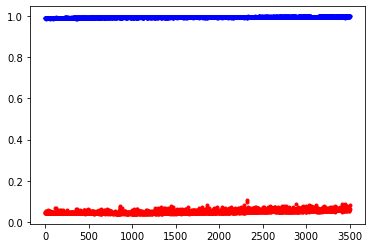

In [51]:
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c = "red", markersize = 3)
plt.plot(x_len, y_acc, "o", c = "blue", markersize = 3)

## 와인의 종류 예측하기
* 정확도가 이전 모델의 것보다 향상될때 모델 저장
* 예측한 실험결과와 테스트셋결과 그래프로 표현 

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint

import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt 
import tensorflow as tf

In [56]:
# seed값 설정
seed = 156
np.random.seed(seed)
tf.random.set_seed(seed)

In [57]:
df_pre = pd.read_csv("/content/sample_data/wine.csv", header = None)
df = df_pre.sample(frac = 0.15)

In [58]:
# 데이터셋 분리
datset = df.values
X = dataset[:, 0:12]
Y = dataset[:, 12]

In [60]:
#모델 설정
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [61]:
# 모델 커마일 
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [62]:
# 모델정보 저장 폴더 
MODEL_DIR = "/content/sample_data/model/"

if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

In [63]:
# 모델 저장조건 설정
modelpath = MODEL_DIR+"{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 0,  save_best_only=True)

In [64]:
# 모델 실행 및 저장
history = model.fit(X, Y, batch_size=500, epochs=3500, validation_split=0.33)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Epoch 1001/3500
9/9 [==============================] - 0s 10ms/step - loss: 0.0352 - accuracy: 0.9911 - val_loss: 0.0578 - val_accuracy: 0.9823
Epoch 1002/3500
9/9 [==============================] - 0s 11ms/step - loss: 0.0309 - accuracy: 0.9911 - val_loss: 0.0428 - val_accuracy: 0.9865
Epoch 1003/3500
9/9 [==============================] - 0s 12ms/step - loss: 0.0281 - accuracy: 0.9920 - val_loss: 0.0425 - val_accuracy: 0.9869
Epoch 1004/3500
9/9 [==============================] - 0s 11ms/step - loss: 0.0270 - accuracy: 0.9931 - val_loss: 0.0412 - val_accuracy: 0.9865
Epoch 1005/3500
9/9 [==============================] - 0s 11ms/step - loss: 0.0313 - accuracy: 0.9897 - val_loss: 0.0441 - val_accuracy: 0.9869
Epoch 1006/3500
9/9 [==============================] - 0s 11ms/step - loss: 0.0410 - accuracy: 0.9875 - val_loss: 0.0480 - val_accuracy: 0.9869
Epoch 1007/3500
9/9 [==============================] - 0s 11ms/step - loss: 0.0357 - accuracy: 0.987

No handles with labels found to put in legend.


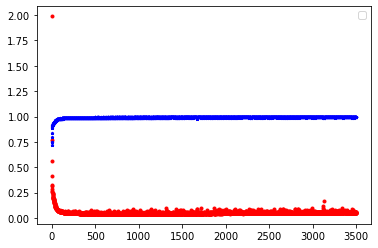

In [66]:
# 실험결과의 오차값 저장
val_loss = history.history['val_loss']  #테스트오차

accuracy = history.history['accuracy']  # 학습셋 정확도 
x_len = np.arange(len(accuracy))

plt.plot(x_len, val_loss, "o", c = 'red', markersize = 3)
plt.plot(x_len, accuracy, "*", c = 'blue', markersize = 3)
plt.legend()
plt.show()

* 학습셋의 정확도는 시간이 흐를수록 좋아지지만, 테스트 결과는 어느정도 이상 시간이 흐르면 더 나아지지 않는것을 그래프로 확인 가능.

### 학습 자동 중단 
* 학습이 진행될 수록 학습셋의 정확도는 올라가지만 과적합때문에 테스트셋의 결과는 점점 더 나빠지게 됩니다.케라스에는 이렇게 학습이 진행되어도 테스트셋 오차가 줄지않으면 학습을 멈추게 하는 함수가 있습니다. 

In [67]:
from tensorflow.keras.callbacks import EarlyStopping

earlyStopping = EarlyStopping(monitor = 'val_loss', patience= 100)

In [68]:
model.fit(X, Y, validation_split= 0.33, epochs=2000, batch_size=500, callbacks=[earlyStopping])

Epoch 1/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0173 - accuracy: 0.9949 - val_loss: 0.0493 - val_accuracy: 0.9879
Epoch 2/2000
9/9 [==============================] - 0s 8ms/step - loss: 0.0166 - accuracy: 0.9943 - val_loss: 0.0513 - val_accuracy: 0.9897
Epoch 3/2000
9/9 [==============================] - 0s 22ms/step - loss: 0.0149 - accuracy: 0.9959 - val_loss: 0.0561 - val_accuracy: 0.9893
Epoch 4/2000
9/9 [==============================] - 0s 8ms/step - loss: 0.0158 - accuracy: 0.9961 - val_loss: 0.0497 - val_accuracy: 0.9893
Epoch 5/2000
9/9 [==============================] - 0s 8ms/step - loss: 0.0161 - accuracy: 0.9952 - val_loss: 0.0498 - val_accuracy: 0.9893
Epoch 6/2000
9/9 [==============================] - 0s 8ms/step - loss: 0.0168 - accuracy: 0.9945 - val_loss: 0.0520 - val_accuracy: 0.9888
Epoch 7/2000
9/9 [==============================] - 0s 8ms/step - loss: 0.0144 - accuracy: 0.9961 - val_loss: 0.0534 - val_accuracy: 0.9902
Epoch 8/2000
9/9 [

## 와인의 종류 예측 - 학습중단 

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

import pandas as pd
import numpy as np 
import tensorflow as tf

#seed값 설정
np.random.seed(11)
tf.random.set_seed(11)

In [73]:
df_pre = pd.read_csv("/content/sample_data/wine.csv", header = None)
df = df_pre.sample(frac= 0.15)

In [74]:
dataset = df.values
X = dataset[:, 0:12]
Y = dataset[:, 12]

In [75]:
# 모델 생성
model = Sequential()
model.add(Dense(30, input_dim = 12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [79]:
# 모델 컴파일
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [80]:
# 학습 자동 중단 설정
early_stopping = EarlyStopping(monitor='val_loss', patience = 100)

In [81]:
# 모델 실행
model.fit(X, Y, batch_size=500, epochs=2000, validation_split=.2, callbacks=[early_stopping])

Epoch 1/2000
2/2 [==============================] - 1s 172ms/step - loss: 0.5136 - accuracy: 0.7875 - val_loss: 0.3818 - val_accuracy: 0.8410
Epoch 2/2000
2/2 [==============================] - 0s 29ms/step - loss: 0.3911 - accuracy: 0.8115 - val_loss: 0.3695 - val_accuracy: 0.8974
Epoch 3/2000
2/2 [==============================] - 0s 28ms/step - loss: 0.3663 - accuracy: 0.8957 - val_loss: 0.4128 - val_accuracy: 0.8513
Epoch 4/2000
2/2 [==============================] - 0s 29ms/step - loss: 0.3804 - accuracy: 0.8922 - val_loss: 0.3504 - val_accuracy: 0.9026
Epoch 5/2000
2/2 [==============================] - 0s 32ms/step - loss: 0.3283 - accuracy: 0.9117 - val_loss: 0.3170 - val_accuracy: 0.9026
Epoch 6/2000
2/2 [==============================] - 0s 32ms/step - loss: 0.3090 - accuracy: 0.8949 - val_loss: 0.3114 - val_accuracy: 0.8974
Epoch 7/2000
2/2 [==============================] - 0s 29ms/step - loss: 0.3032 - accuracy: 0.8860 - val_loss: 0.3080 - val_accuracy: 0.9026
Epoch 8/2000

In [82]:
# 결과 출력
print("\n Accuracy : %.4f" %(model.evaluate(X, Y)[1]))

31/31 [==============================] - 0s 2ms/step - loss: 0.0613 - accuracy: 0.9815

 Accuracy : 0.9815


# 와인종류 예측하기  

## 패키지 로드 

In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import pandas as pd 
import numpy as np 
import os
import tensorflow as tf

# 시드값 설정
seed = 50
np.random.seed(seed)
tf.random.set_seed(seed)

## 데이터세트 로드 및 분리 

In [84]:
df_pre  = pd.read_csv("/content/sample_data/wine.csv", header = None)
df = df_pre.sample(frac = 0.15)
dataset = df.values

X = dataset[:, 0:12]
Y = dataset[:, 12]

## 모델 생성 및 컴파일

In [87]:
model = Sequential()
model.add(Dense(30, input_dim = 12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics = ['accuracy'])

## 모델저장 환경 설정

In [89]:
MODEL_DIR = "/content/sample_data/model/"
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

modelpath = MODEL_DIR+"{epoch:02d}-{val_loss:.4f}.hdf5"

In [92]:
# 모델 업데이트 저장
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 0, save_best_only=True)

In [93]:
# 학습 자동 중단 설정
early_stoppng = EarlyStopping(monitor = 'val_loss',patience = 100)

In [97]:
#수행
model.fit(X, Y, validation_split=0.2, epochs=3500, batch_size=500, verbose = 0,callbacks=[checkpointer, early_stoppng])